In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('paper_style.mplstyle')
from Bio import SeqIO, Phylo
from treeplot import TreePlot
import mtbvartools as vt
from mtbvartools.vcf import filterDataFrame

colors = {
    'dred':    '#c54e52', 'lred':    '#f8b1bb',
    'dblue':   '#3c5488', 'lblue':   '#bfd6ef',
    'dgreen':  '#00a087', 'lgreen':  '#c0e6ea',
    'dpink':   '#d78bbb', 'lpink':   '#f9d5e5',
    'dyellow': '#ccb974', 'lyellow': '#fff0c1',
    'gray': '#c0c0c0'}

# Figure S3 - example variable genes

In [2]:
# load expression data
exp_data_path = 'rnaseq/normalized_isolate_expression.csv'
exp_df = pd.read_csv(
    exp_data_path,
    header=[0, 1, 2], index_col=0)
# get relative expression by strain
mean_exp = exp_df.T.groupby('strain').mean().mean()
rel_exp = exp_df - mean_exp.values.reshape(-1, 1)
rel_exp_by_strain = rel_exp.T.groupby('strain').mean()

# load the tree
tree_path = 'datasets/trees/cohort_trees/rnaseq_strains.iq_snp_gtr_cons.rooted.contree.nwk'
tree = Phylo.read(tree_path, 'newick')

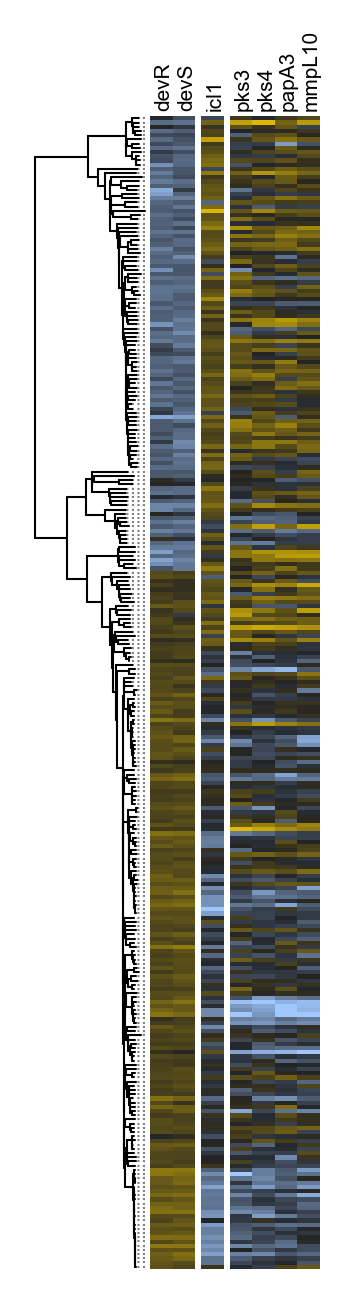

In [3]:
output_dir = 'outputs/figures'
output_name = 'S3A_variable_examples.pdf'


# load in the phylogenetic tree
tree_plot = TreePlot(
    phylo_obj=tree,
    root_name='canettii',
    offset_first=0.025)
# plot the tree
tree_plot.plotTree(
    figsize=(0.5, 5),
    tree_context={'lines.linewidth': 0.5})

# colormap
colormap = sns.diverging_palette(
    250, 70, s=120, l=80, as_cmap=True, center='dark')

block_width = 0.15

####
# plot a set of genes by z-score
target_genes = [
    ('Rv3133c', 'devR'),
    ('Rv3132c', 'devS'),
    ]
#
target_exp_M = rel_exp_by_strain.loc[
    :, np.asarray(target_genes).T[0]]
target_Z_M = target_exp_M / target_exp_M.std(axis=0)

ax = tree_plot.addHeatmap(
    width=len(target_genes) * block_width, input_data=target_Z_M,
    cmap=colormap, cbar=False, rasterized=True,
    vmin=-3, vmax=3,)
ax.set_xticks(
    np.arange(len(target_genes)) + 0.2, labels=np.asarray(target_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
####

####
# plot a set of genes by z-score
target_genes = [
    ('Rv0467', 'icl1'),
    ]
#
target_exp_M = rel_exp_by_strain.loc[
    :, np.asarray(target_genes).T[0]]
target_Z_M = target_exp_M / target_exp_M.std(axis=0)

ax = tree_plot.addHeatmap(
    width=len(target_genes) * block_width, input_data=target_Z_M,
    cmap=colormap, cbar=False, rasterized=True,
    vmin=-3, vmax=3,)
ax.set_xticks(
    np.arange(len(target_genes)) + 0.2, labels=np.asarray(target_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
####

####
# plot a set of genes by z-score
target_genes = [
    ('Rv1180', 'pks3'),
    ('Rv1181', 'pks4'),
    ('Rv1182', 'papA3'),
    ('Rv1183', 'mmpL10'),
    ]
#
target_exp_M = rel_exp_by_strain.loc[
    :, np.asarray(target_genes).T[0]]
target_Z_M = target_exp_M / target_exp_M.std(axis=0)

ax = tree_plot.addHeatmap(
    width=len(target_genes) * block_width, input_data=target_Z_M,
    cmap=colormap, cbar=False, rasterized=True,
    vmin=-3, vmax=3,)
ax.set_xticks(
    np.arange(len(target_genes)) + 0.2, labels=np.asarray(target_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
####

plt.savefig(
    f'{output_dir}/{output_name}', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

# Figure S3 - rnj variants & gene expression

In [18]:
# load expression data
exp_data_path = 'rnaseq/normalized_isolate_expression.csv'
exp_df = pd.read_csv(
    exp_data_path,
    header=[0, 1, 2], index_col=0)
# get relative expression by strain
mean_exp = exp_df.T.groupby('strain').mean().mean()
rel_exp = exp_df - mean_exp.values.reshape(-1, 1)
rel_exp_by_strain = rel_exp.T.groupby('strain').mean()

# load the tree
tree_path = 'datasets/trees/cohort_trees/rnaseq_strains.iq_snp_gtr_cons.rooted.contree.nwk'
tree = Phylo.read(tree_path, 'newick')

# load variants
variant_vcb_path = 'datasets/variants/rnaseq/241103_variant_calls.vcb'
variant_vcb = vt.CallBytestream(
    variant_vcb_path)

# load variant annotations and filter
annotations_path = 'datasets/variants/rnaseq/241103_event_calls.vcb/event_calls.annotated.csv'
annotations_df = pd.read_csv(
    annotations_path, index_col=['pos', 'ref', 'alt'])

# filter to get likely deleterious variants
deleterious_settings = {
    'Annotation': lambda x: any([atype in str(x) for atype in [
        'transcript_ablation',
        'frameshift_variant',
        'stop_gained',
        'start_lost']]),
    'SIFT_score': lambda x: float(x) < 0.05}
deleterious_df = filterDataFrame(
    annotations_df, function_dict=deleterious_settings)

# filter to get hard deleterious mutants
deleterious_settings = {
    'Annotation': lambda x: any([atype in str(x) for atype in [
        'transcript_ablation',
        'frameshift_variant',
        'stop_gained',]]),}
hard_deleterious_df = filterDataFrame(
    annotations_df, function_dict=deleterious_settings)

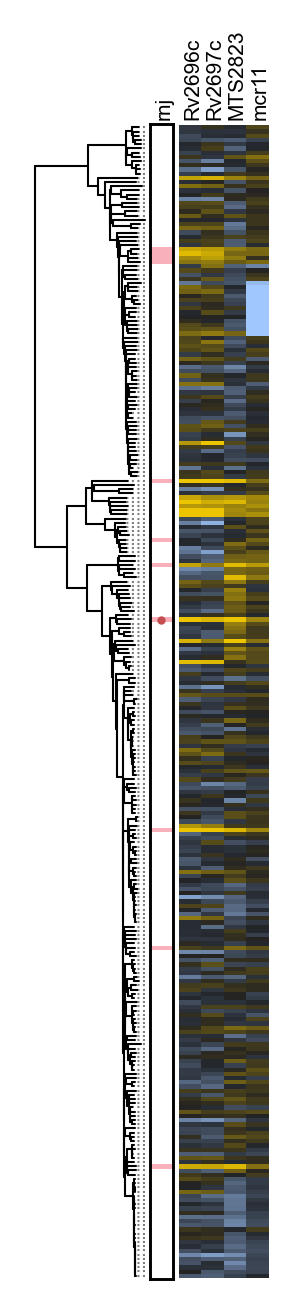

In [19]:
output_dir = 'outputs/figures'
output_name = 'S3B_rnasej_variants.pdf'

# load in the phylogenetic tree
tree_plot = TreePlot(
    phylo_obj=tree,
    root_name='canettii',
    offset_first=0.025)
# plot the tree
tree_plot.plotTree(
    figsize=(0.5, 5),
    tree_context={'lines.linewidth': 0.5})

# colormap
colormap = sns.diverging_palette(
    250, 70, s=120, l=80, as_cmap=True, center='dark')

block_width = 0.15

####
target_variant_genes = [
    ('Rv2752c', 'rnj'),]

variant_cmap = ListedColormap(['white', colors['lred']])

variant_df = []
for variant_gene in target_variant_genes:
    variant_calls = [ # get variant call arrays in the gene
        variant_vcb.calls.loc[var_idx]
        for var_idx, var_data in deleterious_df.loc[
            deleterious_df.Gene_ID == variant_gene[0], :].iterrows()]
    variant_df.append(pd.Series(
        data=np.any(np.asarray(variant_calls) == 1, axis=0),
        index=variant_vcb.calls.col,
        name=variant_gene[1]))
variant_df = pd.DataFrame(variant_df).T

ax = tree_plot.addHeatmap(
    width=len(target_variant_genes) * block_width, input_data=variant_df,
    cmap=variant_cmap, cbar=False, rasterized=True, vmin=0, vmax=1)
ax.set_xticks(
    np.arange(len(target_variant_genes)) + 0.2, labels=np.asarray(target_variant_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
sns.despine(ax=ax, top=False, right=False)
for i in np.arange(len(target_variant_genes) - 1) + 1:
    ax.axvline(i, 0, 1, color='k', lw=0.75)

# add an additional symbol for hard deletions
variant_df = []
for variant_gene in target_variant_genes:
    variant_calls = [ # get variant call arrays in the gene
        variant_vcb.calls.loc[var_idx]
        for var_idx, var_data in hard_deleterious_df.loc[
            hard_deleterious_df.Gene_ID == variant_gene[0], :].iterrows()]
    variant_df.append(pd.Series(
        data=np.any(np.asarray(variant_calls) == 1, axis=0),
        index=variant_vcb.calls.col,
        name=variant_gene[1]))
variant_df = pd.DataFrame(variant_df).T

for i, col in enumerate(variant_df.columns):
    mark_y = [
        tree_plot.leaf_xy_dict[label][1] - 0.5 for label in variant_df.index[variant_df.loc[:, col]]]
    mark_x = np.zeros(len(mark_y)) + i + 0.5
    ax.scatter(
        mark_x, mark_y, marker='o', s=1, color=colors['dred'])
####


####
# plot a set of genes by z-score
target_genes = [
    ('Rv2696c', 'Rv2696c'),
    ('Rv2697c', 'Rv2697c'),
    ('RVnc0036a', 'MTS2823'),
    ('RVnc0013', 'mcr11'),]

#
target_exp_M = rel_exp_by_strain.loc[
    :, np.asarray(target_genes).T[0]]
target_Z_M = target_exp_M / target_exp_M.std(axis=0)

ax = tree_plot.addHeatmap(
    width=len(target_genes) * block_width, input_data=target_Z_M,
    cmap=colormap, cbar=False, rasterized=True,
    vmin=-3, vmax=3,)
ax.set_xticks(
    np.arange(len(target_genes)) + 0.2, labels=np.asarray(target_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
####

plt.savefig(
    f'{output_dir}/{output_name}', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

# Figure 4 - slfR (Rv0042c) variants & gene expression

In [3]:
# load expression data
exp_data_path = 'rnaseq/normalized_isolate_expression.csv'
exp_df = pd.read_csv(
    exp_data_path,
    header=[0, 1, 2], index_col=0)
# get relative expression by strain
mean_exp = exp_df.T.groupby('strain').mean().mean()
rel_exp = exp_df - mean_exp.values.reshape(-1, 1)
rel_exp_by_strain = rel_exp.T.groupby('strain').mean()

# load the tree
tree_path = 'datasets/trees/cohort_trees/rnaseq_strains.iq_snp_gtr_cons.rooted.contree.nwk'
tree = Phylo.read(tree_path, 'newick')

# load variants
variant_vcb_path = 'datasets/variants/rnaseq/241103_variant_calls.vcb'
variant_vcb = vt.CallBytestream(
    variant_vcb_path)

# load variant annotations and filter
annotations_path = 'datasets/variants/rnaseq/241103_event_calls.vcb/event_calls.annotated.csv'
annotations_df = pd.read_csv(
    annotations_path, index_col=['pos', 'ref', 'alt'])

# filter to get likely deleterious variants
deleterious_settings = {
    'Annotation': lambda x: any([atype in str(x) for atype in [
        'transcript_ablation',
        'frameshift_variant',
        'stop_gained',
        'start_lost']]),
    'SIFT_score': lambda x: float(x) < 0.05}
deleterious_df = filterDataFrame(
    annotations_df, function_dict=deleterious_settings)

# filter to get hard deleterious mutants
deleterious_settings = {
    'Annotation': lambda x: any([atype in str(x) for atype in [
        'transcript_ablation',
        'frameshift_variant',
        'stop_gained',]]),}
hard_deleterious_df = filterDataFrame(
    annotations_df, function_dict=deleterious_settings)

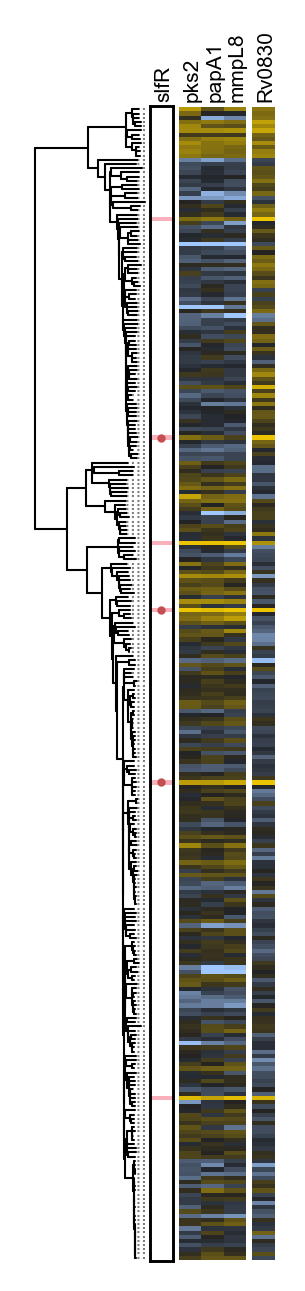

In [5]:
output_dir = 'outputs/figures'
output_name = '4A_slfR_variants.pdf'

# load in the phylogenetic tree
tree_plot = TreePlot(
    phylo_obj=tree,
    root_name='canettii',
    offset_first=0.025)
# plot the tree
tree_plot.plotTree(
    figsize=(0.5, 5),
    tree_context={'lines.linewidth': 0.5})

# colormap
colormap = sns.diverging_palette(
    250, 70, s=120, l=80, as_cmap=True, center='dark')

block_width = 0.15

####
target_variant_genes = [
    ('Rv0042c', 'slfR'),]

variant_cmap = ListedColormap(['white', colors['lred']])

variant_df = []
for variant_gene in target_variant_genes:
    variant_calls = [ # get variant call arrays in the gene
        variant_vcb.calls.loc[var_idx]
        for var_idx, var_data in deleterious_df.loc[
            deleterious_df.Gene_ID == variant_gene[0], :].iterrows()]
    variant_df.append(pd.Series(
        data=np.any(np.asarray(variant_calls) == 1, axis=0),
        index=variant_vcb.calls.col,
        name=variant_gene[1]))
variant_df = pd.DataFrame(variant_df).T

ax = tree_plot.addHeatmap(
    width=len(target_variant_genes) * block_width, input_data=variant_df,
    cmap=variant_cmap, cbar=False, rasterized=True, vmin=0, vmax=1)
ax.set_xticks(
    np.arange(len(target_variant_genes)) + 0.2, labels=np.asarray(target_variant_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
sns.despine(ax=ax, top=False, right=False)
for i in np.arange(len(target_variant_genes) - 1) + 1:
    ax.axvline(i, 0, 1, color='k', lw=0.75)

# add an additional symbol for hard deletions
variant_df = []
for variant_gene in target_variant_genes:
    variant_calls = [ # get variant call arrays in the gene
        variant_vcb.calls.loc[var_idx]
        for var_idx, var_data in hard_deleterious_df.loc[
            hard_deleterious_df.Gene_ID == variant_gene[0], :].iterrows()]
    variant_df.append(pd.Series(
        data=np.any(np.asarray(variant_calls) == 1, axis=0),
        index=variant_vcb.calls.col,
        name=variant_gene[1]))
variant_df = pd.DataFrame(variant_df).T

for i, col in enumerate(variant_df.columns):
    mark_y = [
        tree_plot.leaf_xy_dict[label][1] - 0.5 for label in variant_df.index[variant_df.loc[:, col]]]
    mark_x = np.zeros(len(mark_y)) + i + 0.5
    ax.scatter(
        mark_x, mark_y, marker='o', s=1, color=colors['dred'])
####


####
# plot a set of genes by z-score
target_genes = [
    ('Rv3825c', 'pks2'),
    ('Rv3824c', 'papA1'),
    ('Rv3823c', 'mmpL8'),]

#
target_exp_M = rel_exp_by_strain.loc[
    :, np.asarray(target_genes).T[0]]
target_Z_M = target_exp_M / target_exp_M.std(axis=0)

ax = tree_plot.addHeatmap(
    width=len(target_genes) * block_width, input_data=target_Z_M,
    cmap=colormap, cbar=False, rasterized=True,
    vmin=-3, vmax=3,)
ax.set_xticks(
    np.arange(len(target_genes)) + 0.2, labels=np.asarray(target_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
####


####
# plot a set of genes by z-score
target_genes = [
    ('Rv0830', 'Rv0830'),]

#
target_exp_M = rel_exp_by_strain.loc[
    :, np.asarray(target_genes).T[0]]
target_Z_M = target_exp_M / target_exp_M.std(axis=0)

ax = tree_plot.addHeatmap(
    width=len(target_genes) * block_width, input_data=target_Z_M,
    cmap=colormap, cbar=False, rasterized=True,
    vmin=-3, vmax=3,)
ax.set_xticks(
    np.arange(len(target_genes)) + 0.2, labels=np.asarray(target_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
####


plt.savefig(
    f'{output_dir}/{output_name}', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

# Figure 5 - whiB6 variants & gene expression

In [22]:
# load expression data
exp_data_path = 'rnaseq/normalized_isolate_expression.csv'
exp_df = pd.read_csv(
    exp_data_path,
    header=[0, 1, 2], index_col=0)
# get relative expression by strain
mean_exp = exp_df.T.groupby('strain').mean().mean()
rel_exp = exp_df - mean_exp.values.reshape(-1, 1)
rel_exp_by_strain = rel_exp.T.groupby('strain').mean()

# load the tree
tree_path = 'datasets/trees/cohort_trees/rnaseq_strains.iq_snp_gtr_cons.rooted.contree.nwk'
tree = Phylo.read(tree_path, 'newick')

# load variants
variant_vcb_path = 'datasets/variants/rnaseq/241103_variant_calls.vcb'
variant_vcb = vt.CallBytestream(
    variant_vcb_path)

# load variant annotations and filter
annotations_path = 'datasets/variants/rnaseq/241103_event_calls.vcb/event_calls.annotated.csv'
annotations_df = pd.read_csv(
    annotations_path, index_col=['pos', 'ref', 'alt'])

# filter to get likely deleterious variants
deleterious_settings = {
    'Annotation': lambda x: any([atype in str(x) for atype in [
        'transcript_ablation',
        'frameshift_variant',
        'stop_gained',
        'start_lost']]),
    'SIFT_score': lambda x: float(x) < 0.05}
deleterious_df = filterDataFrame(
    annotations_df, function_dict=deleterious_settings)

# filter to get hard deleterious mutants
deleterious_settings = {
    'Annotation': lambda x: any([atype in str(x) for atype in [
        'transcript_ablation',
        'frameshift_variant',
        'stop_gained',]]),}
hard_deleterious_df = filterDataFrame(
    annotations_df, function_dict=deleterious_settings)

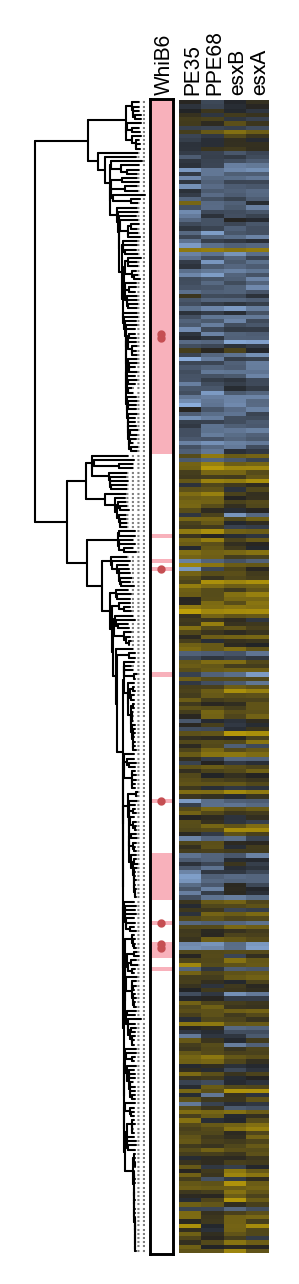

In [23]:
output_dir = 'outputs/figures'
output_name = '5A_whiB6_variants.pdf'

# load in the phylogenetic tree
tree_plot = TreePlot(
    phylo_obj=tree,
    root_name='canettii',
    offset_first=0.025)
# plot the tree
tree_plot.plotTree(
    figsize=(0.5, 5),
    tree_context={'lines.linewidth': 0.5})

# colormap
colormap = sns.diverging_palette(
    250, 70, s=120, l=80, as_cmap=True, center='dark')

block_width = 0.15

####
target_variant_genes = [
    ('Rv3862c', 'WhiB6'),]

variant_cmap = ListedColormap(['white', colors['lred']])

variant_df = []
for variant_gene in target_variant_genes:
    variant_calls = [ # get variant call arrays in the gene
        variant_vcb.calls.loc[var_idx]
        for var_idx, var_data in deleterious_df.loc[
            deleterious_df.Gene_ID == variant_gene[0], :].iterrows()]
    variant_df.append(pd.Series(
        data=np.any(np.asarray(variant_calls) == 1, axis=0),
        index=variant_vcb.calls.col,
        name=variant_gene[1]))
variant_df = pd.DataFrame(variant_df).T

ax = tree_plot.addHeatmap(
    width=len(target_variant_genes) * block_width, input_data=variant_df,
    cmap=variant_cmap, cbar=False, rasterized=True, vmin=0, vmax=1)
ax.set_xticks(
    np.arange(len(target_variant_genes)) + 0.2, labels=np.asarray(target_variant_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
sns.despine(ax=ax, top=False, right=False)
for i in np.arange(len(target_variant_genes) - 1) + 1:
    ax.axvline(i, 0, 1, color='k', lw=0.75)

# add an additional symbol for hard deletions
variant_df = []
for variant_gene in target_variant_genes:
    variant_calls = [ # get variant call arrays in the gene
        variant_vcb.calls.loc[var_idx]
        for var_idx, var_data in hard_deleterious_df.loc[
            hard_deleterious_df.Gene_ID == variant_gene[0], :].iterrows()]
    variant_df.append(pd.Series(
        data=np.any(np.asarray(variant_calls) == 1, axis=0),
        index=variant_vcb.calls.col,
        name=variant_gene[1]))
variant_df = pd.DataFrame(variant_df).T

for i, col in enumerate(variant_df.columns):
    mark_y = [
        tree_plot.leaf_xy_dict[label][1] - 0.5 for label in variant_df.index[variant_df.loc[:, col]]]
    mark_x = np.zeros(len(mark_y)) + i + 0.5
    ax.scatter(
        mark_x, mark_y, marker='o', s=1, color=colors['dred'])
####


####
# plot a set of genes by z-score
target_genes = [
    ('Rv3872', 'PE35'),
    ('Rv3873', 'PPE68'),
    ('Rv3874', 'esxB'),
    ('Rv3875', 'esxA'),]

#
target_exp_M = rel_exp_by_strain.loc[
    :, np.asarray(target_genes).T[0]]
target_Z_M = target_exp_M / target_exp_M.std(axis=0)

ax = tree_plot.addHeatmap(
    width=len(target_genes) * block_width, input_data=target_Z_M,
    cmap=colormap, cbar=False, rasterized=True,
    vmin=-3, vmax=3,)
ax.set_xticks(
    np.arange(len(target_genes)) + 0.2, labels=np.asarray(target_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
####

plt.savefig(
    f'{output_dir}/{output_name}', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

# Figure 6 - espACD gene expression

In [25]:
# load expression data
exp_data_path = 'rnaseq/normalized_isolate_expression.csv'
exp_df = pd.read_csv(
    exp_data_path,
    header=[0, 1, 2], index_col=0)
# get relative expression by strain
mean_exp = exp_df.T.groupby('strain').mean().mean()
rel_exp = exp_df - mean_exp.values.reshape(-1, 1)
rel_exp_by_strain = rel_exp.T.groupby('strain').mean()

# load the tree
tree_path = 'datasets/trees/cohort_trees/rnaseq_strains.iq_snp_gtr_cons.rooted.contree.nwk'
tree = Phylo.read(tree_path, 'newick')

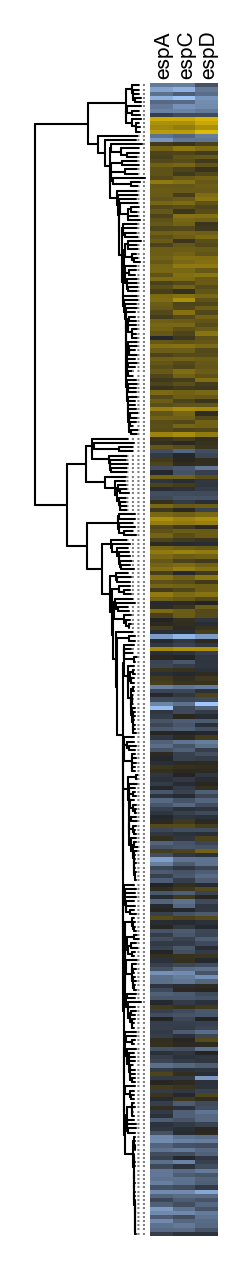

In [30]:
output_dir = 'outputs/figures'
output_name = '6A_espACD_full_tree.pdf'


# load in the phylogenetic tree
tree_plot = TreePlot(
    phylo_obj=tree,
    root_name='canettii',
    offset_first=0.025)
# plot the tree
tree_plot.plotTree(
    figsize=(0.5, 5),
    tree_context={'lines.linewidth': 0.5})

# colormap
colormap = sns.diverging_palette(
    250, 70, s=120, l=80, as_cmap=True, center='dark')

block_width = 0.15

####
# plot a set of genes by z-score
target_genes = [
    ('Rv3616c', 'espA'),
    ('Rv3615c', 'espC'),
    ('Rv3614c', 'espD'),]
#
target_exp_M = rel_exp_by_strain.loc[
    :, np.asarray(target_genes).T[0]]
target_Z_M = target_exp_M / target_exp_M.std(axis=0)

ax = tree_plot.addHeatmap(
    width=len(target_genes) * block_width, input_data=target_Z_M,
    cmap=colormap, cbar=False, rasterized=True,
    vmin=-3, vmax=3,)
ax.set_xticks(
    np.arange(len(target_genes)) + 0.2, labels=np.asarray(target_genes).T[1])
ax.tick_params(
    top=True, bottom=False, labeltop=True, labelbottom=False, length=0, pad=1, labelsize=5)
plt.setp(ax.get_xticklabels(), rotation=90, ha="left") # rotation_mode="anchor")
ax.set_ylabel('')
####

plt.savefig(
    f'{output_dir}/{output_name}', format='pdf', bbox_inches='tight', dpi=300)
plt.show()